In [1]:
"""
Created on Thur Sep  14 00:25:54 2023
@author: Fernandez, Maria Giselle
"""

'\nCreated on Thur Sep  14 00:25:54 2023\n@author: Fernandez, Maria Giselle\n'

In [2]:
# Required Libraries: Import the libraries essential for plotting and numerical operations.
import matplotlib.pyplot as plt
import numpy as np

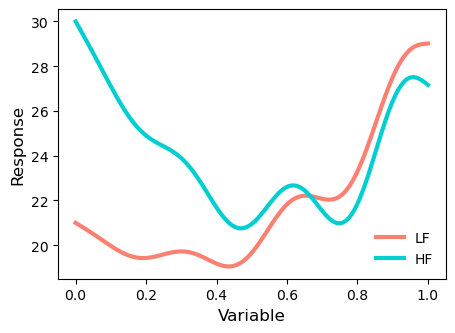

In [3]:
# Define the High-Fidelity function (HF)
def func_HF(x):
    return 2*x*np.sin(20*x+2) + 10*np.exp(x) + 20*(x-1)**2

# Define the Low-Fidelity function (LF)
def func_LF(x):
    return 1.4*x*np.sin(20*x + 2) + 7*np.exp(x) + 14*(x - 1)**2 + 10*x

# Lower and upper bounds for function evaluations
lb = 0
ub = 1

# Generate an array of 100 points, linearly spaced between the lower and upper bounds
x = np.linspace(lb, ub, 100)

# Evaluate the High-Fidelity function (HF) at these points
fHF = func_HF(x)

# Evaluate the Low-Fidelity function (LF) at these points
fLF = func_LF(x)

# Initialize the figure for plotting
plt.figure(figsize=[5, 3.5])

# Plot the Low-Fidelity function (LF)
plt.plot(x, fLF, c='salmon', linewidth=3, label='LF')

# Plot the High-Fidelity function (HF)
plt.plot(x, fHF, c='darkturquoise', linewidth=3, label='HF')

# Configure plot parameters
#plt.xlim([0, 1])
#plt.ylim([18, 30])
plt.legend(frameon=False)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Response', fontsize=12)

# Save the plot as a high-resolution PNG file
plt.savefig('Functions.png', dpi=1000, bbox_inches='tight', transparent=True)


### Polynomial Fitting for Additive and Multiplicative Models

In these segments, numpy's polyfit method is used to fit a second-degree polynomial model. For the additive model, the polynomial is fitted to the difference between the High-Frequency (HF) and Low-Frequency (LF) functions, func_HF(x_sampHF) - func_LF(x_sampHF). For the multiplicative model, it is fitted to the ratio, func_HF(x_sampHF) / func_LF(x_sampHF).
Definition of Additive and Multiplicative Functions

The func_add function returns the sum of the fitted additive model and the Low-Frequency function. This effectively reconstructs the High-Frequency function from the additive model and Low-Frequency function. Similarly, func_mult reconstructs the High-Frequency function by multiplying the fitted multiplicative model with the Low-Frequency function.
Random Number Generation and Synthetic Data Construction

The numpy random seed is set for reproducibility. A random array x_add_mult with 200 elements is generated, each element being incremented by 1. This array is used as the input to generate synthetic output data y_add and y_mult for additive and multiplicative models, respectively.


In [5]:
# Import numpy if not already imported; uncomment the next line if necessary
# import numpy as np

# The x_sampHF array holds sample points from a High-Fidelity (HF) function.
# These points will be used in fitting the polynomial model.
x_sampHF = np.array([0.1, 0.5, 0.9])

# The x_sampLF array holds sample points for the Low-Fidelity (LF) function, represented by 'x'.
# It is assumed that 'x' is defined elsewhere in the code.
x_sampLF = x

# Polynomial fitting for the additive model. The 'deg=2' parameter specifies
# that a second-degree polynomial is fit to the difference between the HF and LF function values.
model_add = np.poly1d(np.polyfit(x_sampHF, func_HF(x_sampHF) - func_LF(x_sampHF), deg=2))

# Polynomial fitting for the multiplicative model. Here, the ratio of the HF to LF
# function values is considered, and a second-degree polynomial is fit.
model_mult = np.poly1d(np.polyfit(x_sampHF, func_HF(x_sampHF) / func_LF(x_sampHF), deg=2))

# Definition of the function for the additive model.
# This function computes the sum of the polynomial model and the LF function.
def func_add(x):
    return model_add(x) + func_LF(x)

# Definition of the function for the multiplicative model.
# This function computes the product of the polynomial model and the LF function.
def func_mult(x):
    return model_mult(x) * func_LF(x)

# Random number generation for synthetic data construction.
# Here, 200 random numbers are generated and added to 1.
# The resulting array 'x_add_mult' is used to evaluate the additive and multiplicative models.
np.random.seed(1)
x_add_mult = np.random.random(200) + 1

# Evaluate the additive model for each point in 'x_add_mult'.
y_add = func_add(x_add_mult)

# Evaluate the multiplicative model for each point in 'x_add_mult'.
y_mult = func_mult(x_add_mult)


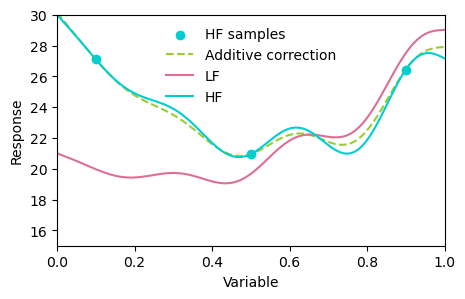

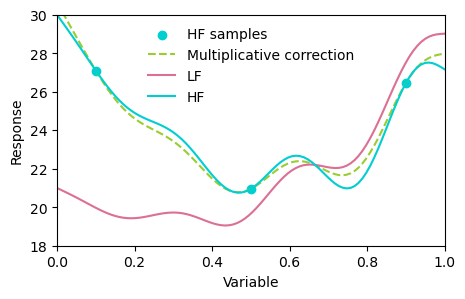

In [7]:
plt.figure(figsize=[5,3])
plt.scatter(x_sampHF,func_HF(x_sampHF),c='darkturquoise',label='HF samples')
plt.plot(x,func_add(x),'--',c='yellowgreen',label='Additive correction')
plt.plot(x,fLF,c='palevioletred',label='LF')
plt.plot(x,fHF,c='darkturquoise',label='HF')
plt.xlim([0,1])
plt.legend(frameon=False)
plt.xlabel('Variable')
plt.ylabel('Response')
plt.ylim([15,30])
plt.savefig('Add.png',dpi=1000, bbox_inches='tight', transparent=True)
plt.figure(figsize=[5,3])
plt.scatter(x_sampHF,func_HF(x_sampHF),c='darkturquoise',label='HF samples')
plt.plot(x,func_mult(x),'--',c='yellowgreen',label='Multiplicative correction')
plt.plot(x,fLF,c='palevioletred',label='LF')
plt.plot(x,fHF,c='darkturquoise',label='HF')
plt.xlabel('Variable')
plt.ylabel('Response')
plt.xlim([0,1])
plt.ylim([18,30])
plt.legend(frameon=False)
plt.savefig('Mult.png',dpi=1000, bbox_inches='tight', transparent=True)

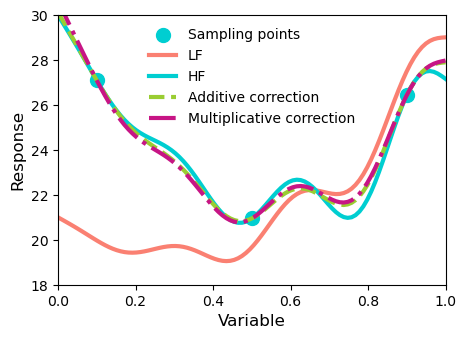

In [8]:
plt.figure(figsize=[5,3.5])
plt.scatter(x_sampHF,func_HF(x_sampHF),100,c='darkturquoise',label='Sampling points')
plt.plot(x,fLF,c='salmon',linewidth=3,label='LF')
plt.plot(x,fHF,c='darkturquoise',linewidth=3,label='HF')
plt.plot(x,func_add(x),'--',c='yellowgreen',linewidth=3,label='Additive correction')
plt.plot(x,func_mult(x),'-.',c='mediumvioletred',linewidth=3,label='Multiplicative correction')
plt.xlim([0,1])
plt.legend(frameon=False, fontsize=10)
plt.xlabel('Variable',fontsize=12)
plt.ylabel('Response',fontsize=12)
plt.ylim([18,30])
plt.savefig('AddMult.png',dpi=1000, bbox_inches='tight', transparent=True)